F1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}

In [65]:
import numpy as np
import pandas as pd


In [66]:
df = pd.read_csv('train.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Serial Number   3459 non-null   int64 
 1   Unnamed: 0.1    3459 non-null   int64 
 2   Unnamed: 0      3459 non-null   int64 
 3   Company Name    3459 non-null   object
 4   Location        3459 non-null   object
 5   Datum           3459 non-null   object
 6   Detail          3459 non-null   object
 7   Status Rocket   3459 non-null   object
 8    Rocket         751 non-null    object
 9   Status Mission  3459 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 270.4+ KB


In [80]:
df.isna().sum()

Serial Number        0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           2708
Status Mission       0
dtype: int64

In [68]:
df[['Unnamed: 0.1','Unnamed: 0']].sample(10)

,Unnamed: 0.1,Unnamed: 0
1714,585,585
2712,924,924
208,1760,1760
432,2423,2423
1066,456,456
254,2044,2044
819,1420,1420
277,4037,4037
1972,2120,2120
3364,870,870


In [69]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [70]:
df

,Serial Number,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,3677,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Thu Apr 18, 1968 10:30 UTC",Voskhod | Cosmos 214,StatusRetired,NaN,1
1,64,CASC,"LC-101, Wenchang Satellite Launch Center, China","Fri Dec 27, 2019 12:45 UTC",Long March 5 | Shijian-20,StatusActive,NaN,1
2,3930,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Thu Nov 04, 1965 05:31 UTC",Cosmos-2I (63SM) | Cosmos 95,StatusRetired,NaN,1
3,2035,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Sat Nov 15, 1986 21:35 UTC",Molniya-M /Block ML | Molniya-1 n†­127,StatusRetired,NaN,1
4,1310,VKS RF,"Site 32/1, Plesetsk Cosmodrome, Russia","Mon Jun 15, 1998 22:58 UTC",Tsyklon-3 | Cosmos 2352 to 2357,StatusRetired,NaN,0
...,...,...,...,...,...,...,...,...
3454,3445,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Aug 10, 1970 19:59 UTC",Cosmos-2I (63SM) | Cosmos 356,StatusRetired,NaN,1
3455,467,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Jan 27, 2016 23:20 UTC",Ariane 5 ECA | Intelsat 29e,StatusActive,200.0,1
3456,3093,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Nov 03, 1973 05:45 UTC",Atlas-SLV3D Centaur-D1A | Mariner 10,StatusRetired,NaN,1
3457,3773,RVSN USSR,"Site 161/35, Baikonur Cosmodrome, Kazakhstan","Wed May 17, 1967 16:05 UTC",Tsyklon | Cosmos 160,StatusRetired,NaN,1


In [71]:
df.columns

Index(['Serial Number', 'Company Name', 'Location', 'Datum', 'Detail',
       'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

## Univariate Analysis

### Numerical Columns 
- `Serial Number` This is just a unique Identifier. So I don't have to do anything with this.
- `Status Mission` Just do univariate Analysis for this feature

Observation
- `Status Mission` This is also catagorical column have been just encoded

In [72]:
df['Status Mission'].describe()

count    3459.000000
mean        0.896502
std         0.304652
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Status Mission, dtype: float64

<AxesSubplot: ylabel='Frequency'>

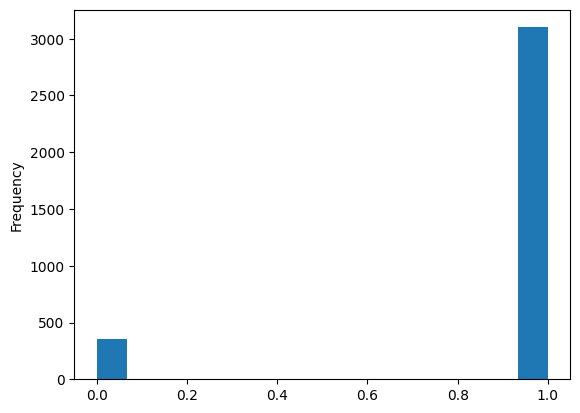

In [73]:
df['Status Mission'].plot(kind='hist',bins=15)

In [74]:
df['Status Mission']

0       1
1       1
2       1
3       1
4       0
       ..
3454    1
3455    1
3456    1
3457    1
3458    1
Name: Status Mission, Length: 3459, dtype: int64

## Categorical columns
- `Company Name`: The name of the company that conducted the mission.
- `Location`: The location from where the mission was launched.
- `Datum`: The date and time of the mission launch.
- `Detail`: Details about the mission.
- `Status Rocket`: The status of the rocket used in the mission.
- `Rocket`: The cost of the rocket in million USD.
- `Status Mission`: The outcome of the mission.( 1: Success or 0 : Failure)

### Company Name

In [75]:
df['Company Name'].value_counts() 

RVSN USSR           1433
Arianespace          223
General Dynamics     211
CASC                 186
NASA                 166
VKS RF               152
US Air Force         128
ULA                  114
Boeing               111
Martin Marietta       91
SpaceX                71
MHI                   69
Lockheed              66
Northrop              63
ISRO                  61
Roscosmos             46
ILS                   35
Sea Launch            30
ISAS                  24
Kosmotras             15
US Navy               14
Eurockot              12
ISA                   12
ESA                   12
Blue Origin           11
Rocket Lab             9
ExPace                 8
CNES                   7
IAI                    7
Land Launch            7
JAXA                   6
ASI                    6
AMBA                   6
MITT                   6
Arm??e de l'Air        4
CASIC                  4
UT                     4
KCST                   4
Exos                   3
CECLES                 3


In [95]:
for i in range(0,10):
    print(i,len(df['Company Name'].value_counts()[df['Company Name'].value_counts() > i]))

0 52
1 46
2 41
3 38
4 34
5 34
6 30
7 27
8 26
9 25


In [89]:
df['Company Name'].nunique()

52

<AxesSubplot: >

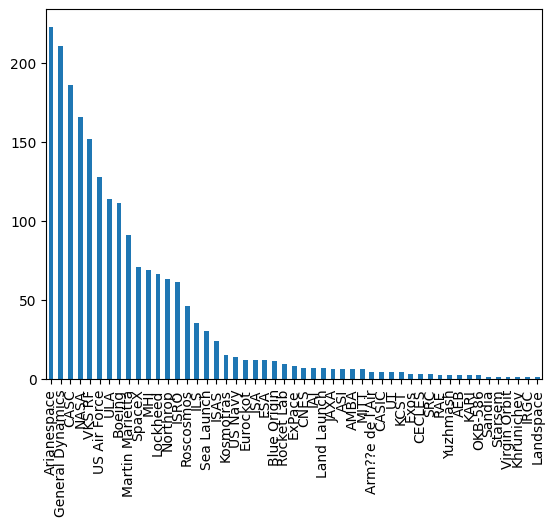

In [93]:
df['Company Name'].value_counts()[df['Company Name'].value_counts() < 1300].plot(kind='bar')

<AxesSubplot: >

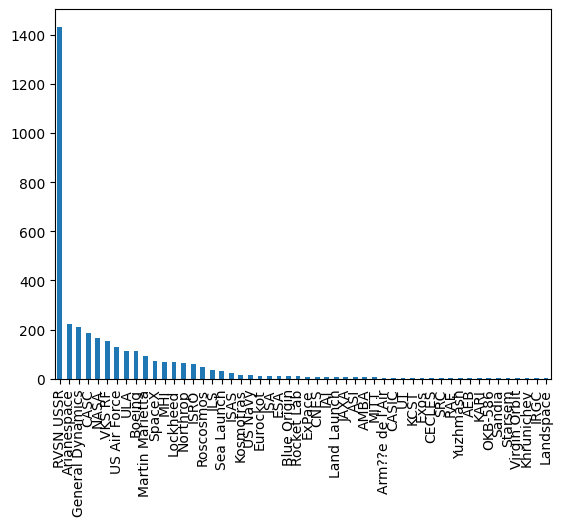

In [77]:
df['Company Name'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Company Name'>

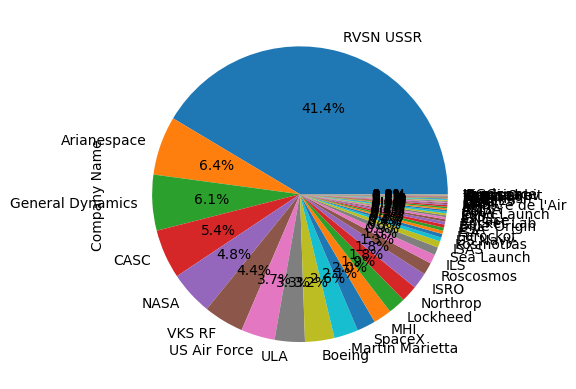

In [78]:
df['Company Name'].value_counts().plot(kind='pie',autopct='%0.1f%%')